In [26]:
# df = pd.read_csv("/home/miruna.clinciu/plankton-dsg-challenge-main/data/testdataframe.csv")
import pandas as pd
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')
train
test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [27]:
print(train["label2"])

index
1        noncopepod
2        noncopepod
3        noncopepod
4        noncopepod
5        noncopepod
            ...    
58787      detritus
58788      detritus
58789      detritus
58790      detritus
58791      detritus
Name: label2, Length: 51309, dtype: object


In [29]:
train = train.drop(['img_file_name'], axis = 1)
cols = [col for col in train.columns]
print(cols)

cols_remove = [col for col in train.columns if col not in ['Index', 'filename','filename.1', 'label1', 'label2', 'label3']]


['filename', 'label1', 'label2', 'label3', 'object_label', 'object_width', 'object_height', 'object_bx', 'object_by', 'object_circ.', 'object_area_exc', 'object_area', 'object_%area', 'object_major', 'object_minor', 'object_y', 'object_x', 'object_convex_area', 'object_min', 'object_max', 'object_mean', 'object_intden', 'object_perim.', 'object_elongation', 'object_range', 'object_perimareaexc', 'object_perimmajor', 'object_circex', 'object_angle', 'object_bounding_box_area', 'object_eccentricity', 'object_equivalent_diameter', 'object_euler_number', 'object_extent', 'object_local_centroid_col', 'object_local_centroid_row', 'object_solidity', 'img_rank']


In [33]:
test = test.drop(['img_file_name'], axis = 1)
cols = [col for col in test.columns]
print(cols)

cols_remove = [col for col in test.columns if col not in ['Index', 'filename','filename.1', 'label1', 'label2', 'label3']]


['filename', 'label1', 'label2', 'label3', 'object_label', 'object_width', 'object_height', 'object_bx', 'object_by', 'object_circ.', 'object_area_exc', 'object_area', 'object_%area', 'object_major', 'object_minor', 'object_y', 'object_x', 'object_convex_area', 'object_min', 'object_max', 'object_mean', 'object_intden', 'object_perim.', 'object_elongation', 'object_range', 'object_perimareaexc', 'object_perimmajor', 'object_circex', 'object_angle', 'object_bounding_box_area', 'object_eccentricity', 'object_equivalent_diameter', 'object_euler_number', 'object_extent', 'object_local_centroid_col', 'object_local_centroid_row', 'object_solidity', 'img_rank']


In [34]:
train

,filename,label1,label2,label3,object_label,object_width,object_height,object_bx,object_by,object_circ.,...,object_angle,object_bounding_box_area,object_eccentricity,object_equivalent_diameter,object_euler_number,object_extent,object_local_centroid_col,object_local_centroid_row,object_solidity,img_rank
index,,,,,,,,,,,,,,,,,,,,,
1,Pia1.2016-10-04.1801+N292_hc.tif,zooplankton,noncopepod,annelida_polychaeta,1,208,208,0,0,0.793005,...,135.0,43264,0.000000,234.702867,1,1.0,103.5,103.5,1.0,1
2,Pia1.2016-10-05.1229+N28_hc.tif,zooplankton,noncopepod,annelida_polychaeta,1,96,82,0,0,0.798380,...,180.0,7872,0.520028,100.114643,1,1.0,47.5,40.5,1.0,1
3,Pia1.2016-10-06.2118+N136_hc.tif,zooplankton,noncopepod,annelida_polychaeta,1,128,108,0,0,0.793144,...,180.0,13824,0.536753,132.669753,1,1.0,63.5,53.5,1.0,1
4,Pia1.2017-03-21.1136+N01644266_hc.tif,zooplankton,noncopepod,annelida_polychaeta,1,80,104,0,0,0.789097,...,90.0,8320,0.639001,102.924016,1,1.0,39.5,51.5,1.0,1
5,Pia1.2017-03-21.1136+N01646706_hc.tif,zooplankton,noncopepod,annelida_polychaeta,1,112,86,0,0,0.787688,...,180.0,9632,0.640647,110.742238,1,1.0,55.5,42.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18785,Pia1.2017-10-26.1849+N00014584_hc.tif,zooplankton,noncopepod,tunicata_doliolida,1,152,164,0,0,0.794288,...,90.0,24928,0.375490,178.155312,1,1.0,75.5,81.5,1.0,1
18786,Pia1.2017-10-26.1849+N00014648_hc.tif,zooplankton,noncopepod,tunicata_doliolida,1,168,116,0,0,0.769873,...,180.0,19488,0.723368,157.521085,1,1.0,83.5,57.5,1.0,1
18787,Pia1.2017-10-26.1849+N00014681_hc.tif,zooplankton,noncopepod,tunicata_doliolida,1,168,126,0,0,0.779945,...,180.0,21168,0.661450,164.170444,1,1.0,83.5,62.5,1.0,1


In [35]:
train = train[~train.label2.str.contains("detritus")]
test = test[~test.label2.str.contains("detritus")]

In [43]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train['label2'] = LE.fit_transform(train['label2'])
test['label2'] = LE.fit_transform(test['label2'])

In [44]:
import numpy as np
# df[:] = np.nan_to_num(df)
# df[df==np.inf]=np.nan
# df = df.dropna()


In [45]:
from sklearn.model_selection import train_test_split

X_train = train[cols_remove]  # Features
y_train = train["label2"]


X_test = test[cols_remove]  # Features
y_test = test["label2"]

# y=df['label1']  # Labels
# y=df['label2']  # Labels
# y=df['label3']  # Labels
# print(y)
#X = X.astype(float)
#y = y.astype(float)


# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
# print (X_train)

# X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
#X_test.fillna(X_test.mean())





In [52]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)



y_preds_df = pd.DataFrame(data = y_pred, columns = ['preds'], index = X_test.index.copy())
data = pd.merge(df, y_preds_df, how = 'left', left_index = True, right_index = True)
prediction = data.to_csv('/home/miruna.clinciu/plankton-dsg-challenge-main/data/prediction2.csv')


In [47]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2550535077288942
Mean Squared Error: 0.2550535077288942
Root Mean Squared Error: 0.5050282246854072


In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7449464922711059


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[862 160]
 [269 391]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1022
           1       0.71      0.59      0.65       660

    accuracy                           0.74      1682
   macro avg       0.74      0.72      0.72      1682
weighted avg       0.74      0.74      0.74      1682

0.7449464922711059


In [50]:
import pandas as pd
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

object_mean                   0.145845
object_range                  0.131149
object_max                    0.116349
object_min                    0.112392
object_intden                 0.092384
object_circex                 0.033162
object_area                   0.028538
object_circ.                  0.028456
object_equivalent_diameter    0.028083
object_area_exc               0.027408
object_perimareaexc           0.024675
object_convex_area            0.024359
object_bounding_box_area      0.021788
object_eccentricity           0.020750
object_elongation             0.020221
object_perimmajor             0.019327
object_major                  0.018944
object_perim.                 0.017900
object_height                 0.015897
object_local_centroid_row     0.015618
object_y                      0.015065
object_width                  0.010704
object_minor                  0.009557
object_local_centroid_col     0.009227
object_x                      0.008964
object_angle             

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# # Get and reshape confusion matrix data
# matrix = confusion_matrix(y_test, y_pred)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# # custom_style = {'axes.labelcolor': 'white',
# #                 'xtick.color': 'white',
# #                 'ytick.color': 'white'}
# # sns.set_style("darkgrid", rc=custom_style)
# import seaborn as sns

# ax = sns.heatmap(matrix, annot=True, cmap='viridis')

# ax.set_title('Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values');
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

No handles with labels found to put in legend.


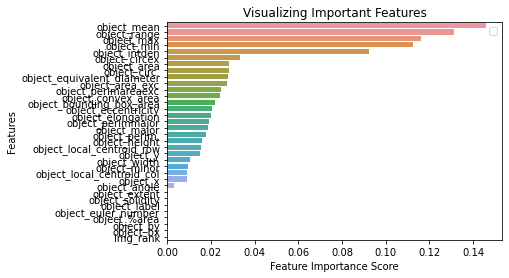

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()